In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
# Importing the datasets
train = pd.read_csv('C:/Users/USER/train(excellent).csv')
test = pd.read_csv('C:/Users/USER/test(excellent).csv')
submission = pd.read_csv('C:/Users/USER/SampleSubmission(excellent).csv')

In [3]:
# train.head()
train.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [4]:
# test.head()
test.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year
count,2871.000000,3532.000000,3532.000000,3532.000000
mean,12.781665,0.065030,296.903392,2004.900057
std,4.554868,0.049454,181.897221,8.497250
min,4.555000,0.000000,78.230000,1992.000000
25%,8.840000,0.026811,145.307500,1994.000000
50%,12.600000,0.054444,237.770000,2006.000000
75%,16.600000,0.094049,461.002500,2011.000000
max,21.350000,0.321115,667.220000,2016.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


In [7]:
train.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [8]:
test.isnull().sum()

Item_ID                  0
Store_ID                 0
Item_Store_ID            0
Item_Weight            661
Item_Sugar_Content       0
Item_Visibility          0
Item_Type                0
Item_Price               0
Store_Start_Year         0
Store_Size             959
Store_Location_Type      0
Store_Type               0
dtype: int64

# Fixing the missing values

In [9]:
train["Store_Size"].mode()

0    Medium
dtype: object

In [10]:
test["Store_Size"].mode()

0    Medium
dtype: object

In [11]:
train["Store_Size"].replace(np.nan, "Medium", inplace=True)
test["Store_Size"].replace(np.nan, "Medium", inplace=True)
train["Item_Weight"].fillna(method='bfill', inplace=True)
test["Item_Weight"].fillna(method='bfill', inplace=True)

# Visualizations

Text(0.5, 1.0, 'Store type with Item Store Returns')

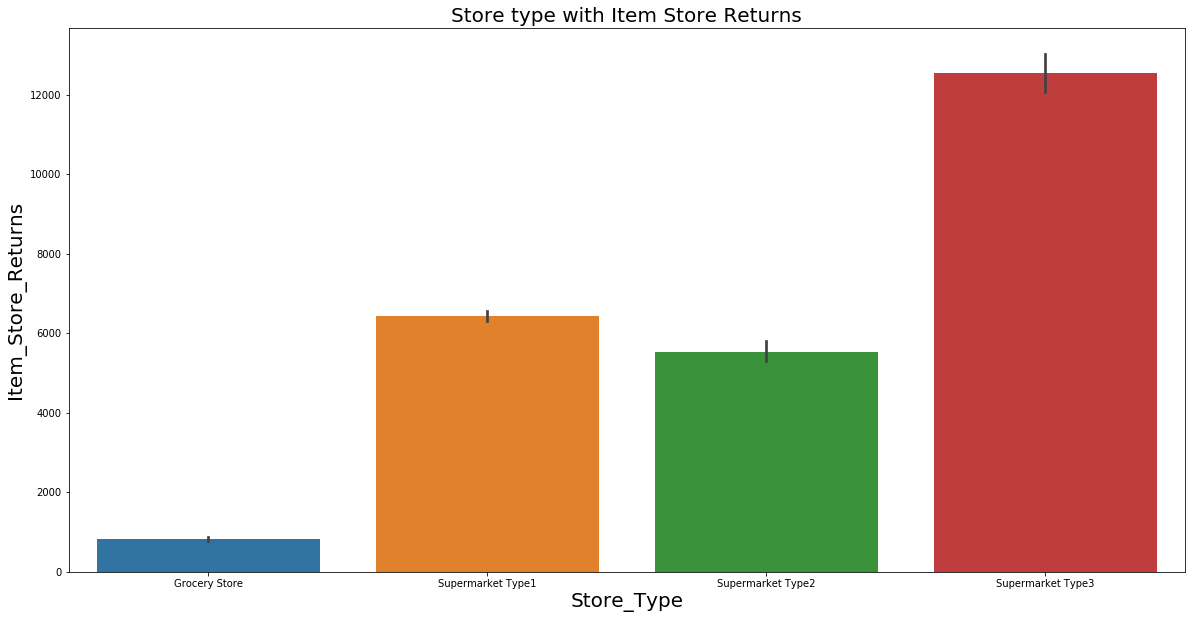

In [12]:
plt.figure(figsize=(20,10))
plt.xlabel('Store_Type', fontsize=20)
plt.ylabel('Item_Store_Returns', fontsize=20)
sns.barplot(train['Store_Type'], train['Item_Store_Returns'])
plt.title('Store type with Item Store Returns', fontsize = 20)

Text(0.5, 1.0, 'Item Stores Return with Item type')

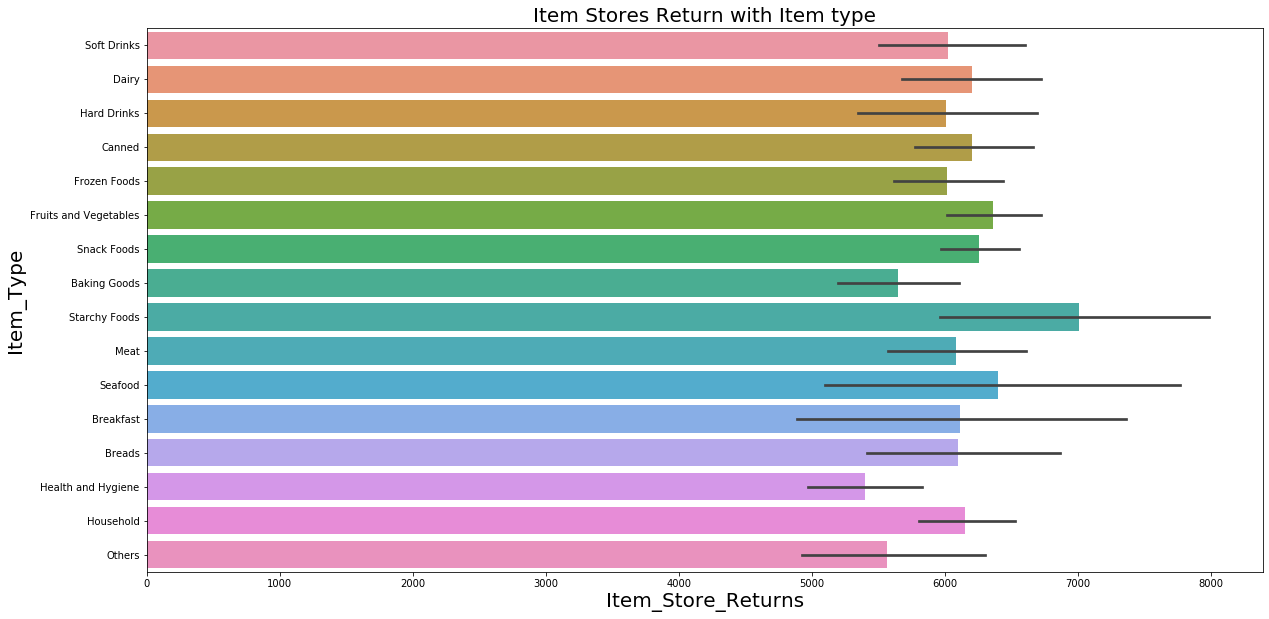

In [13]:
plt.figure(figsize=(20,10))
plt.ylabel('Item_Type', fontsize=20)
plt.xlabel('Item_Store_Returns', fontsize=20)
sns.barplot(train['Item_Store_Returns'], train['Item_Type'])
plt.title('Item Stores Return with Item type', fontsize = 20)

Text(0.5, 1.0, 'Store_Size with Item_Store_Returns')

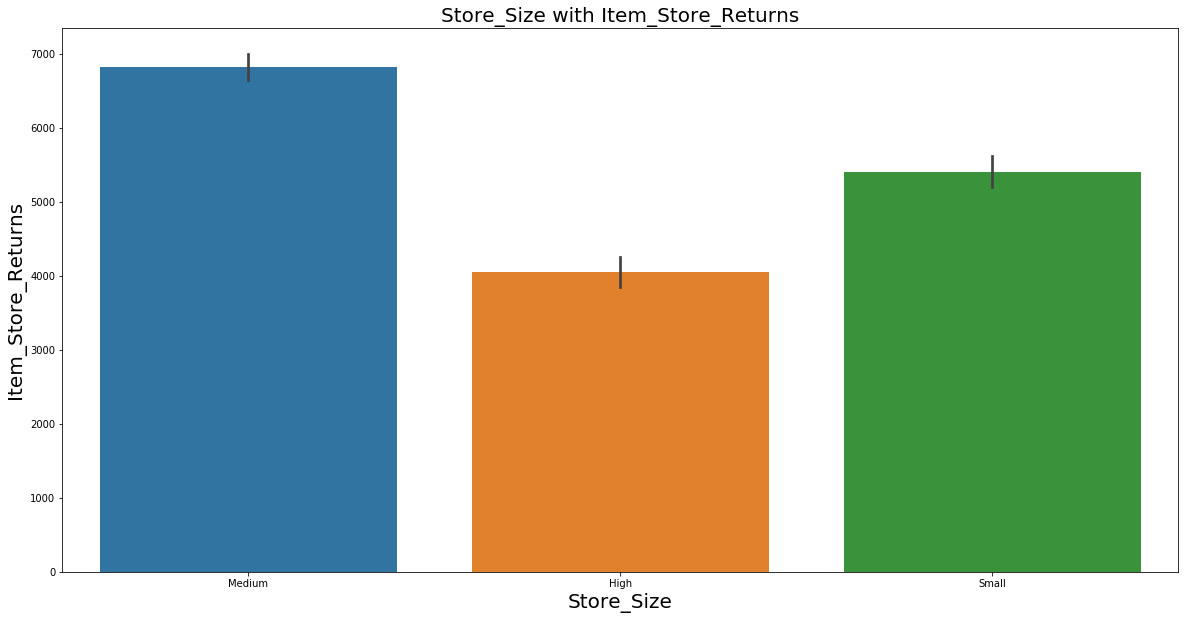

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel('Store_Size', fontsize=20)
plt.ylabel('Item_Store_Returns', fontsize=20)
sns.barplot(train['Store_Size'], train['Item_Store_Returns'])
plt.title('Store_Size with Item_Store_Returns', fontsize = 20)

Text(0.5, 1.0, 'Item Stores Return with Store_ID')

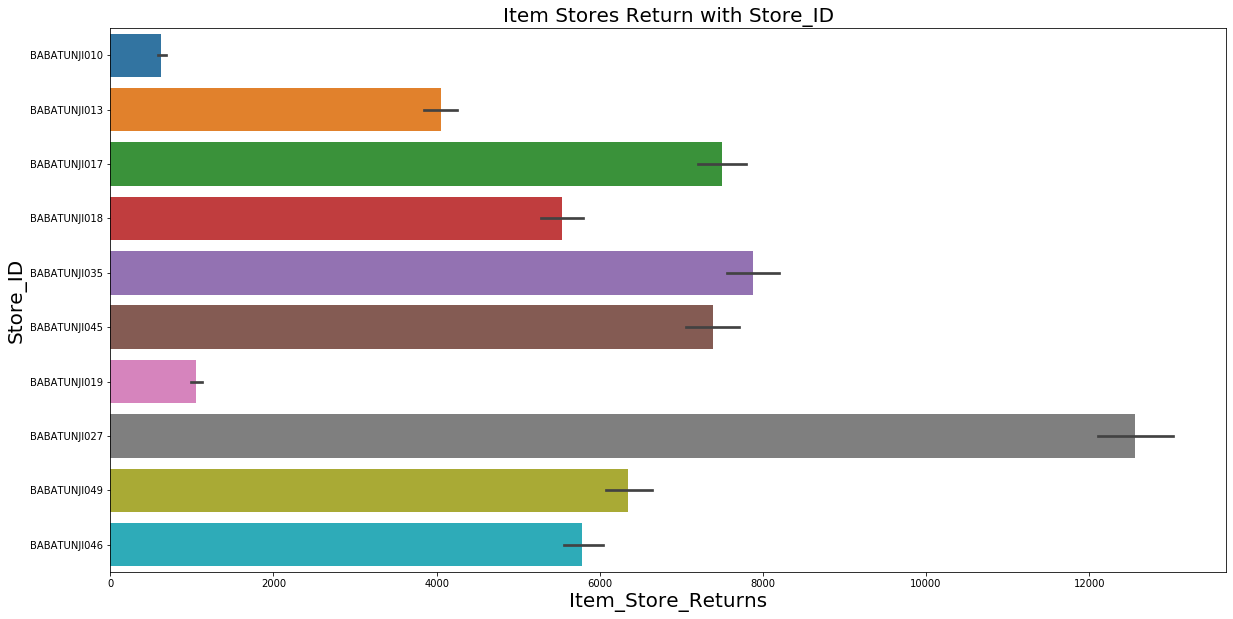

In [15]:
plt.figure(figsize=(20,10))
plt.xlabel('Item_Store_Returns', fontsize=20)
plt.ylabel('Store_ID', fontsize=20)
sns.barplot(train['Item_Store_Returns'], train['Store_ID'])
plt.title('Item Stores Return with Store_ID', fontsize=20)

Text(0.5, 1.0, 'Item Stores Return with Store_Location_Type')

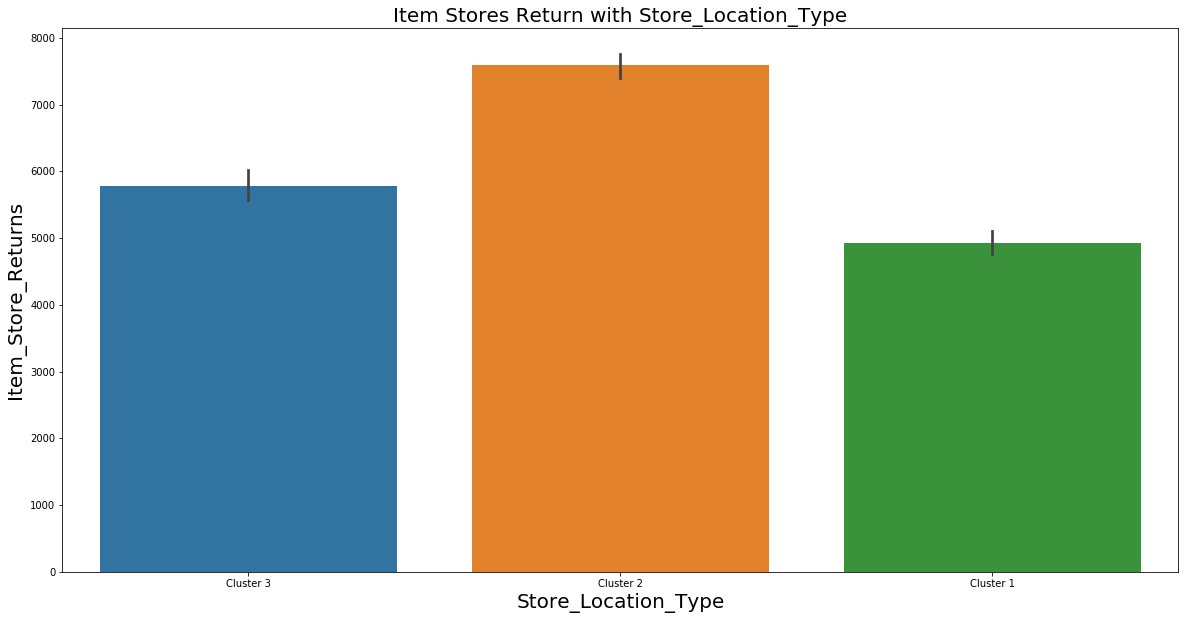

In [16]:
plt.figure(figsize=(20,10))
plt.xlabel('Store_Location_Type', fontsize=20)
plt.ylabel('Item_Store_Returns', fontsize=20)
sns.barplot(train['Store_Location_Type'], train['Item_Store_Returns'])
plt.title('Item Stores Return with Store_Location_Type', fontsize=20)

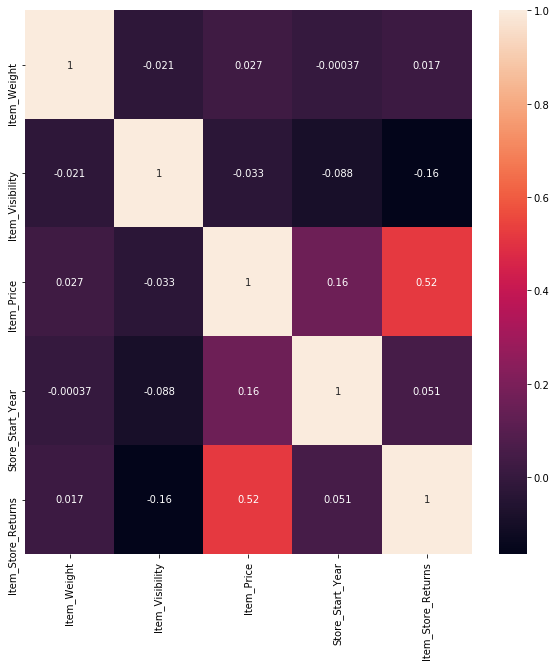

In [17]:
corr_matrix = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

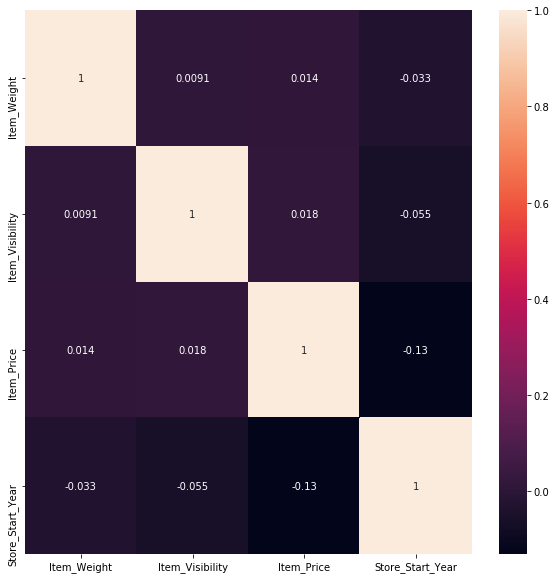

In [18]:
corr_matrix = test.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

Text(0.5, 1.0, 'Item Type to Store Type')

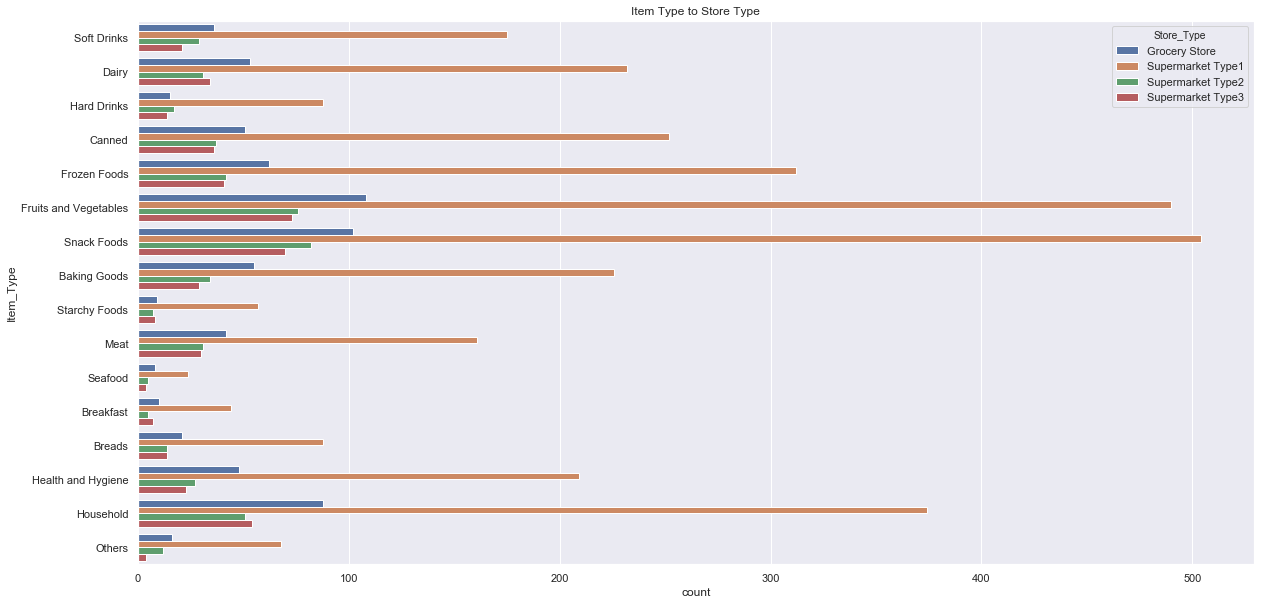

In [19]:
sns.set(style= "darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(y= "Item_Type", hue= "Store_Type",data= train)
plt.title("Item Type to Store Type")

In [20]:
# Splitting into dependent and independent varaibles
X = train.drop(['Item_ID','Store_ID','Item_Store_ID','Item_Store_Returns','Item_Visibility','Item_Type','Store_Start_Year'], axis=1)
Y = train[['Item_Store_Returns']].values

In [21]:
test_given = test.drop(['Item_ID','Store_ID','Item_Store_ID','Item_Visibility','Item_Type','Store_Start_Year'], axis=1)

In [22]:
test_given = pd.get_dummies(test_given)
test_given = test_given.values

In [23]:
# Encoding categorical variables
X = pd.get_dummies(X)
X = X.values

In [24]:
X.reshape(-1,1)
Y.reshape(-1,1)

array([[  709.08],
       [ 6381.69],
       [ 6381.69],
       ...,
       [ 5685.93],
       [11778.  ],
       [17870.07]])

In [25]:
# splitting into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [26]:
# Ridge Regression Model
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

print('Coefficients: \n', reg.coef_)
print('Mean squared error: ', mean_squared_error(Y_test,Y_pred))
print('r2 error:', r2_score(Y_test,Y_pred))

Coefficients: 
 [[    7.0598866     14.9344995    -19.56399565   230.15272466
   -210.58872901 -1636.20864913   813.24895547   822.95969367
   -762.13124183  -597.82893701  1359.96017885 -4512.46648339
   1642.93381163 -1407.13905789  4276.67172965]]
Mean squared error:  8934791.881205212
r2 error: 0.5519305219361531


# CatBoost

In [27]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,Y_train)

Learning rate set to 0.049936
0:	learn: 4323.0659165	total: 89.8ms	remaining: 1m 29s
1:	learn: 4213.1171121	total: 99.7ms	remaining: 49.7s
2:	learn: 4111.1958722	total: 116ms	remaining: 38.6s
3:	learn: 4018.7939906	total: 123ms	remaining: 30.7s
4:	learn: 3935.7835426	total: 137ms	remaining: 27.3s
5:	learn: 3856.3524776	total: 146ms	remaining: 24.2s
6:	learn: 3778.3686891	total: 167ms	remaining: 23.7s
7:	learn: 3705.1791499	total: 177ms	remaining: 21.9s
8:	learn: 3639.3414956	total: 187ms	remaining: 20.6s
9:	learn: 3580.7057098	total: 196ms	remaining: 19.4s
10:	learn: 3526.5473907	total: 203ms	remaining: 18.2s
11:	learn: 3473.1351586	total: 213ms	remaining: 17.5s
12:	learn: 3427.1807106	total: 222ms	remaining: 16.9s
13:	learn: 3385.5350438	total: 232ms	remaining: 16.3s
14:	learn: 3346.5589345	total: 241ms	remaining: 15.8s
15:	learn: 3309.3249096	total: 250ms	remaining: 15.4s
16:	learn: 3273.5527906	total: 260ms	remaining: 15s
17:	learn: 3245.7846246	total: 265ms	remaining: 14.5s
18:	lea

170:	learn: 2792.1888797	total: 1.33s	remaining: 6.43s
171:	learn: 2790.8973121	total: 1.33s	remaining: 6.42s
172:	learn: 2790.1673139	total: 1.34s	remaining: 6.41s
173:	learn: 2789.3783414	total: 1.35s	remaining: 6.39s
174:	learn: 2788.8442068	total: 1.35s	remaining: 6.38s
175:	learn: 2788.3514739	total: 1.36s	remaining: 6.37s
176:	learn: 2787.5362986	total: 1.36s	remaining: 6.35s
177:	learn: 2786.6215967	total: 1.37s	remaining: 6.35s
178:	learn: 2786.1489887	total: 1.38s	remaining: 6.33s
179:	learn: 2784.8783427	total: 1.39s	remaining: 6.32s
180:	learn: 2784.3303785	total: 1.39s	remaining: 6.31s
181:	learn: 2783.5152802	total: 1.4s	remaining: 6.3s
182:	learn: 2782.8921184	total: 1.41s	remaining: 6.28s
183:	learn: 2782.3711801	total: 1.41s	remaining: 6.27s
184:	learn: 2781.7143135	total: 1.42s	remaining: 6.26s
185:	learn: 2781.1594333	total: 1.43s	remaining: 6.25s
186:	learn: 2780.7978008	total: 1.43s	remaining: 6.23s
187:	learn: 2779.3368810	total: 1.44s	remaining: 6.22s
188:	learn: 

337:	learn: 2658.0371950	total: 2.5s	remaining: 4.89s
338:	learn: 2657.4696686	total: 2.5s	remaining: 4.88s
339:	learn: 2656.8188496	total: 2.51s	remaining: 4.88s
340:	learn: 2655.8503554	total: 2.52s	remaining: 4.88s
341:	learn: 2655.5494672	total: 2.53s	remaining: 4.87s
342:	learn: 2654.9939494	total: 2.54s	remaining: 4.86s
343:	learn: 2654.2734044	total: 2.55s	remaining: 4.86s
344:	learn: 2653.1669181	total: 2.56s	remaining: 4.85s
345:	learn: 2652.5960133	total: 2.56s	remaining: 4.85s
346:	learn: 2651.4730453	total: 2.57s	remaining: 4.83s
347:	learn: 2650.6404517	total: 2.58s	remaining: 4.83s
348:	learn: 2649.8613341	total: 2.58s	remaining: 4.82s
349:	learn: 2649.2765336	total: 2.59s	remaining: 4.81s
350:	learn: 2648.2720590	total: 2.6s	remaining: 4.8s
351:	learn: 2647.0899472	total: 2.6s	remaining: 4.79s
352:	learn: 2646.5358464	total: 2.61s	remaining: 4.79s
353:	learn: 2645.5242429	total: 2.62s	remaining: 4.77s
354:	learn: 2644.6341445	total: 2.62s	remaining: 4.77s
355:	learn: 264

511:	learn: 2548.3603151	total: 3.49s	remaining: 3.32s
512:	learn: 2547.5462173	total: 3.49s	remaining: 3.31s
513:	learn: 2547.1681538	total: 3.5s	remaining: 3.31s
514:	learn: 2546.4016993	total: 3.5s	remaining: 3.3s
515:	learn: 2545.5146638	total: 3.51s	remaining: 3.29s
516:	learn: 2544.7067547	total: 3.51s	remaining: 3.28s
517:	learn: 2543.6287195	total: 3.52s	remaining: 3.27s
518:	learn: 2543.1409772	total: 3.52s	remaining: 3.27s
519:	learn: 2542.2922686	total: 3.53s	remaining: 3.26s
520:	learn: 2541.9453967	total: 3.54s	remaining: 3.25s
521:	learn: 2541.1823216	total: 3.54s	remaining: 3.24s
522:	learn: 2540.7659973	total: 3.55s	remaining: 3.24s
523:	learn: 2540.0256212	total: 3.55s	remaining: 3.23s
524:	learn: 2538.8647871	total: 3.56s	remaining: 3.22s
525:	learn: 2538.0677331	total: 3.56s	remaining: 3.21s
526:	learn: 2537.0805813	total: 3.57s	remaining: 3.2s
527:	learn: 2536.3767893	total: 3.58s	remaining: 3.2s
528:	learn: 2535.9863812	total: 3.58s	remaining: 3.19s
529:	learn: 253

666:	learn: 2465.9869102	total: 4.32s	remaining: 2.16s
667:	learn: 2465.7042110	total: 4.33s	remaining: 2.15s
668:	learn: 2465.2418714	total: 4.33s	remaining: 2.14s
669:	learn: 2464.8072872	total: 4.34s	remaining: 2.14s
670:	learn: 2464.1085804	total: 4.34s	remaining: 2.13s
671:	learn: 2463.9055849	total: 4.35s	remaining: 2.12s
672:	learn: 2463.4019337	total: 4.35s	remaining: 2.11s
673:	learn: 2463.1686815	total: 4.36s	remaining: 2.11s
674:	learn: 2462.6450373	total: 4.36s	remaining: 2.1s
675:	learn: 2462.0795223	total: 4.37s	remaining: 2.09s
676:	learn: 2461.7756219	total: 4.37s	remaining: 2.09s
677:	learn: 2461.4251772	total: 4.38s	remaining: 2.08s
678:	learn: 2461.1415070	total: 4.38s	remaining: 2.07s
679:	learn: 2460.7237546	total: 4.39s	remaining: 2.06s
680:	learn: 2460.1230526	total: 4.39s	remaining: 2.06s
681:	learn: 2459.4379252	total: 4.39s	remaining: 2.05s
682:	learn: 2459.0702874	total: 4.4s	remaining: 2.04s
683:	learn: 2458.9042755	total: 4.4s	remaining: 2.03s
684:	learn: 2

848:	learn: 2386.0113185	total: 5.16s	remaining: 918ms
849:	learn: 2385.7491793	total: 5.16s	remaining: 911ms
850:	learn: 2385.5416441	total: 5.17s	remaining: 905ms
851:	learn: 2385.1723591	total: 5.17s	remaining: 899ms
852:	learn: 2384.7461490	total: 5.18s	remaining: 892ms
853:	learn: 2384.4603001	total: 5.18s	remaining: 886ms
854:	learn: 2383.9167231	total: 5.19s	remaining: 880ms
855:	learn: 2383.5691688	total: 5.19s	remaining: 874ms
856:	learn: 2382.9791856	total: 5.2s	remaining: 868ms
857:	learn: 2382.6578556	total: 5.2s	remaining: 861ms
858:	learn: 2382.0045226	total: 5.21s	remaining: 855ms
859:	learn: 2381.3347178	total: 5.21s	remaining: 849ms
860:	learn: 2380.9838168	total: 5.22s	remaining: 842ms
861:	learn: 2380.7276764	total: 5.22s	remaining: 836ms
862:	learn: 2380.2426961	total: 5.23s	remaining: 830ms
863:	learn: 2379.5412595	total: 5.23s	remaining: 823ms
864:	learn: 2379.3975914	total: 5.24s	remaining: 817ms
865:	learn: 2379.1570426	total: 5.24s	remaining: 811ms
866:	learn: 

In [28]:
coeff_score = cat.score(X_test,Y_test)
coeff_score

-1575.577886848386

In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly', degree=4)
regressor.fit(X_train,Y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
Y_pred = regressor.predict(X_test)

In [31]:
mse = mean_squared_error(Y_pred,Y_test)
rmse = np.sqrt(mse)
rmse

4101.957440893218

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train.ravel())
Y_pred = reg.predict(X_test)

In [34]:
mse = mean_squared_error(Y_test, Y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_test,Y_test))

The mean squared error (MSE) on test set: 8766408.8224
0.5603747375676953


In [35]:
mse = mean_squared_error(Y_test, Y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(r2_score(Y_test,Y_pred))

The mean squared error (MSE) on test set: 8766408.8224
0.5603747375676953


In [36]:
# Predicting the given test set
reg = GradientBoostingRegressor()
reg.fit(X_train, Y_train.ravel())
Y_pred_test = reg.predict(test_given)

In [37]:
identifier = test['Item_Store_ID']
identifier

sub = pd.DataFrame(identifier, columns=['Item_Store_ID'])
sub['Item_Store_Returns'] = Y_pred_test
sub

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1465.006323
1,DRA59_BABATUNJI013,7947.200039
2,DRB01_BABATUNJI013,7916.993683
3,DRB13_BABATUNJI010,1127.553732
4,DRB13_BABATUNJI013,7490.849555
...,...,...
3527,NCZ42_BABATUNJI010,2669.010183
3528,NCZ42_BABATUNJI013,9747.743242
3529,NCZ42_BABATUNJI049,9518.608005
3530,NCZ53_BABATUNJI010,1464.504388


In [38]:
sub.to_csv('My_submission3.csv', index=False)

In [54]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,Y_train)
Y_pred_test1 = cat.predict(test_given)

Learning rate set to 0.049936
0:	learn: 4323.0659165	total: 19.9ms	remaining: 19.9s
1:	learn: 4213.1171121	total: 37ms	remaining: 18.5s
2:	learn: 4111.1958722	total: 46.2ms	remaining: 15.3s
3:	learn: 4018.7939906	total: 61.3ms	remaining: 15.3s
4:	learn: 3935.7835426	total: 82.6ms	remaining: 16.4s
5:	learn: 3856.3524776	total: 103ms	remaining: 17s
6:	learn: 3778.3686891	total: 112ms	remaining: 15.9s
7:	learn: 3705.1791499	total: 119ms	remaining: 14.7s
8:	learn: 3639.3414956	total: 134ms	remaining: 14.8s
9:	learn: 3580.7057098	total: 183ms	remaining: 18.1s
10:	learn: 3526.5473907	total: 189ms	remaining: 17s
11:	learn: 3473.1351586	total: 201ms	remaining: 16.5s
12:	learn: 3427.1807106	total: 221ms	remaining: 16.8s
13:	learn: 3385.5350438	total: 236ms	remaining: 16.6s
14:	learn: 3346.5589345	total: 249ms	remaining: 16.4s
15:	learn: 3309.3249096	total: 259ms	remaining: 15.9s
16:	learn: 3273.5527906	total: 267ms	remaining: 15.5s
17:	learn: 3245.7846246	total: 272ms	remaining: 14.8s
18:	learn

173:	learn: 2789.3783414	total: 1.33s	remaining: 6.33s
174:	learn: 2788.8442068	total: 1.34s	remaining: 6.32s
175:	learn: 2788.3514739	total: 1.34s	remaining: 6.3s
176:	learn: 2787.5362986	total: 1.35s	remaining: 6.29s
177:	learn: 2786.6215967	total: 1.36s	remaining: 6.28s
178:	learn: 2786.1489887	total: 1.36s	remaining: 6.26s
179:	learn: 2784.8783427	total: 1.37s	remaining: 6.25s
180:	learn: 2784.3303785	total: 1.38s	remaining: 6.23s
181:	learn: 2783.5152802	total: 1.39s	remaining: 6.23s
182:	learn: 2782.8921184	total: 1.39s	remaining: 6.22s
183:	learn: 2782.3711801	total: 1.4s	remaining: 6.2s
184:	learn: 2781.7143135	total: 1.4s	remaining: 6.19s
185:	learn: 2781.1594333	total: 1.41s	remaining: 6.17s
186:	learn: 2780.7978008	total: 1.42s	remaining: 6.15s
187:	learn: 2779.3368810	total: 1.42s	remaining: 6.14s
188:	learn: 2778.3994891	total: 1.43s	remaining: 6.12s
189:	learn: 2777.1673098	total: 1.43s	remaining: 6.11s
190:	learn: 2776.2568468	total: 1.44s	remaining: 6.09s
191:	learn: 27

351:	learn: 2647.0899472	total: 2.35s	remaining: 4.32s
352:	learn: 2646.5358464	total: 2.35s	remaining: 4.31s
353:	learn: 2645.5242429	total: 2.36s	remaining: 4.3s
354:	learn: 2644.6341445	total: 2.36s	remaining: 4.29s
355:	learn: 2644.0323548	total: 2.37s	remaining: 4.28s
356:	learn: 2643.5079216	total: 2.37s	remaining: 4.27s
357:	learn: 2642.4271097	total: 2.38s	remaining: 4.26s
358:	learn: 2642.1251059	total: 2.38s	remaining: 4.25s
359:	learn: 2641.5875449	total: 2.39s	remaining: 4.25s
360:	learn: 2640.8939660	total: 2.39s	remaining: 4.24s
361:	learn: 2640.1697071	total: 2.4s	remaining: 4.23s
362:	learn: 2639.7282379	total: 2.4s	remaining: 4.22s
363:	learn: 2638.7730700	total: 2.41s	remaining: 4.21s
364:	learn: 2638.0687851	total: 2.41s	remaining: 4.2s
365:	learn: 2636.9875927	total: 2.42s	remaining: 4.19s
366:	learn: 2636.3906988	total: 2.42s	remaining: 4.18s
367:	learn: 2635.7654391	total: 2.43s	remaining: 4.17s
368:	learn: 2635.1318922	total: 2.44s	remaining: 4.16s
369:	learn: 26

508:	learn: 2549.5398509	total: 3.18s	remaining: 3.07s
509:	learn: 2549.2352627	total: 3.19s	remaining: 3.06s
510:	learn: 2548.9877231	total: 3.19s	remaining: 3.06s
511:	learn: 2548.3603151	total: 3.2s	remaining: 3.05s
512:	learn: 2547.5462173	total: 3.2s	remaining: 3.04s
513:	learn: 2547.1681538	total: 3.21s	remaining: 3.04s
514:	learn: 2546.4016993	total: 3.22s	remaining: 3.03s
515:	learn: 2545.5146638	total: 3.22s	remaining: 3.02s
516:	learn: 2544.7067547	total: 3.23s	remaining: 3.02s
517:	learn: 2543.6287195	total: 3.23s	remaining: 3.01s
518:	learn: 2543.1409772	total: 3.24s	remaining: 3s
519:	learn: 2542.2922686	total: 3.25s	remaining: 3s
520:	learn: 2541.9453967	total: 3.25s	remaining: 2.99s
521:	learn: 2541.1823216	total: 3.26s	remaining: 2.98s
522:	learn: 2540.7659973	total: 3.26s	remaining: 2.98s
523:	learn: 2540.0256212	total: 3.27s	remaining: 2.97s
524:	learn: 2538.8647871	total: 3.27s	remaining: 2.96s
525:	learn: 2538.0677331	total: 3.28s	remaining: 2.95s
526:	learn: 2537.0

683:	learn: 2458.9042755	total: 4.03s	remaining: 1.86s
684:	learn: 2458.1559071	total: 4.03s	remaining: 1.85s
685:	learn: 2457.7447395	total: 4.03s	remaining: 1.85s
686:	learn: 2457.3019631	total: 4.04s	remaining: 1.84s
687:	learn: 2456.6025571	total: 4.04s	remaining: 1.83s
688:	learn: 2455.6837456	total: 4.05s	remaining: 1.83s
689:	learn: 2455.4029741	total: 4.05s	remaining: 1.82s
690:	learn: 2454.8813113	total: 4.06s	remaining: 1.81s
691:	learn: 2454.5177929	total: 4.06s	remaining: 1.81s
692:	learn: 2454.2619263	total: 4.07s	remaining: 1.8s
693:	learn: 2453.8096791	total: 4.07s	remaining: 1.8s
694:	learn: 2452.9276135	total: 4.08s	remaining: 1.79s
695:	learn: 2452.7398995	total: 4.08s	remaining: 1.78s
696:	learn: 2452.3291158	total: 4.09s	remaining: 1.78s
697:	learn: 2452.1358445	total: 4.09s	remaining: 1.77s
698:	learn: 2451.7201957	total: 4.1s	remaining: 1.76s
699:	learn: 2451.4578599	total: 4.1s	remaining: 1.76s
700:	learn: 2451.1806871	total: 4.11s	remaining: 1.75s
701:	learn: 24

833:	learn: 2392.5065982	total: 4.7s	remaining: 935ms
834:	learn: 2391.8565256	total: 4.7s	remaining: 929ms
835:	learn: 2391.1051837	total: 4.71s	remaining: 923ms
836:	learn: 2390.3569374	total: 4.71s	remaining: 918ms
837:	learn: 2389.9202247	total: 4.72s	remaining: 912ms
838:	learn: 2389.7532599	total: 4.72s	remaining: 906ms
839:	learn: 2389.2308172	total: 4.72s	remaining: 900ms
840:	learn: 2388.7998323	total: 4.73s	remaining: 894ms
841:	learn: 2388.6431888	total: 4.73s	remaining: 888ms
842:	learn: 2388.2282355	total: 4.74s	remaining: 882ms
843:	learn: 2388.0562951	total: 4.74s	remaining: 877ms
844:	learn: 2387.4030171	total: 4.75s	remaining: 871ms
845:	learn: 2387.0938140	total: 4.75s	remaining: 865ms
846:	learn: 2386.7612873	total: 4.75s	remaining: 859ms
847:	learn: 2386.4785598	total: 4.76s	remaining: 853ms
848:	learn: 2386.0113185	total: 4.76s	remaining: 847ms
849:	learn: 2385.7491793	total: 4.76s	remaining: 841ms
850:	learn: 2385.5416441	total: 4.77s	remaining: 835ms
851:	learn: 

996:	learn: 2330.9306057	total: 5.36s	remaining: 16.1ms
997:	learn: 2330.5175544	total: 5.36s	remaining: 10.7ms
998:	learn: 2330.0869166	total: 5.37s	remaining: 5.37ms
999:	learn: 2329.6832965	total: 5.37s	remaining: 0us


In [55]:
identifier1 = test['Item_Store_ID']
identifier1

sub1 = pd.DataFrame(identifier1, columns=['Item_Store_ID'])
sub1['Item_Store_Returns'] = Y_pred_test1
sub1

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1806.576837
1,DRA59_BABATUNJI013,10797.659589
2,DRB01_BABATUNJI013,8734.527187
3,DRB13_BABATUNJI010,634.865658
4,DRB13_BABATUNJI013,9519.576671
...,...,...
3527,NCZ42_BABATUNJI010,4265.927193
3528,NCZ42_BABATUNJI013,11146.588628
3529,NCZ42_BABATUNJI049,10490.331064
3530,NCZ53_BABATUNJI010,2222.044304


In [56]:
sub1.to_csv('My_submission5.csv', index=False)

In [ ]:
[col for col in X.columns if X[col].isnull().any()]